In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('mnist_train.csv')
x_train = df.drop('label', axis=1)
y_train = df['label']

x_train.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train.shape

(60000, 784)

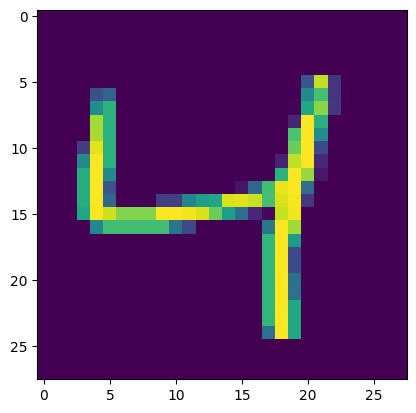

In [4]:
plt.imshow(x_train.values[2].reshape(28,28))

In [5]:
x_train = x_train.astype("float32") / 255

In [6]:
pca = PCA(n_components=2)
T = pca.fit_transform(x_train)
T.shape

(60000, 2)

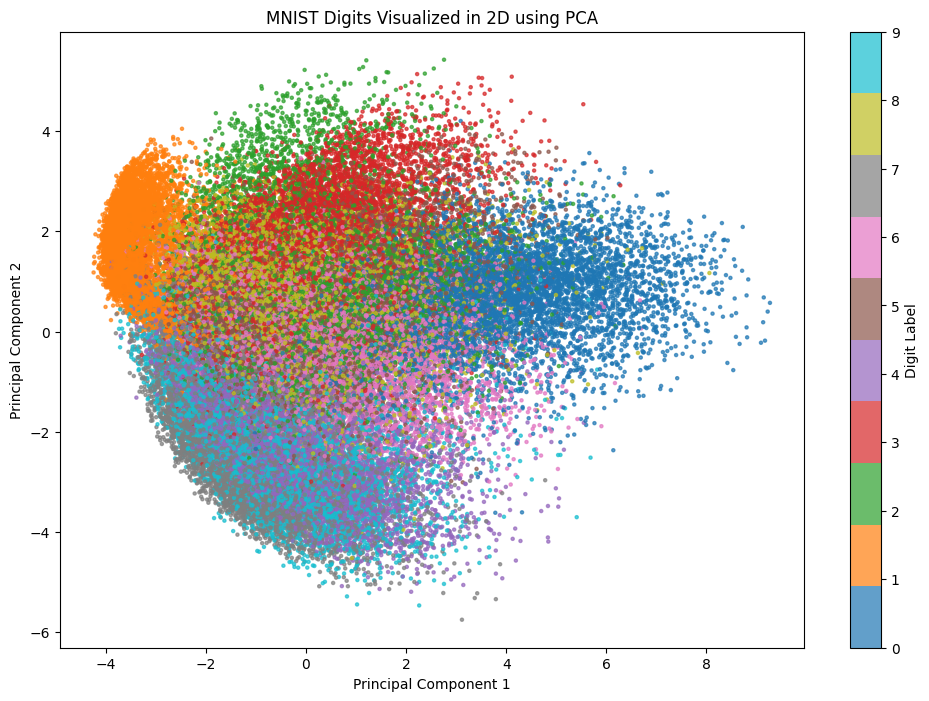

In [7]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(T[:, 0], T[:, 1], c=y_train, cmap='tab10', alpha=0.7, s=5)
plt.colorbar(scatter, label='Digit Label')
plt.title('MNIST Digits Visualized in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

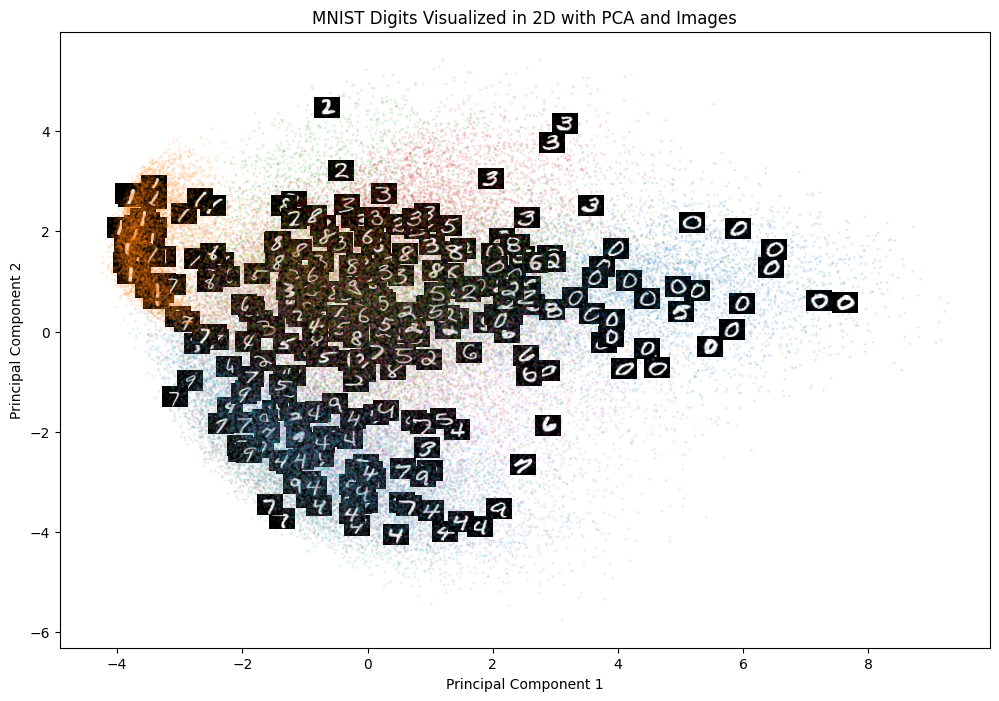

In [8]:

# Plot setup
plt.figure(figsize=(12, 8))
plt.title('MNIST Digits Visualized in 2D with PCA and Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot subset with digit images
indices = np.random.choice(len(T), size=300, replace=False)
for i in indices:
    x, y_pos = T[int(i),:]
    digit_image = x_train.values[i].reshape(28, 28)
    plt.imshow(
        digit_image, extent=(x-0.2, x+0.2, y_pos-0.2, y_pos+0.2), cmap='gray', aspect='auto'
    )

# Scatter plot for context
plt.scatter(T[:, 0], T[:, 1], c=y_train, cmap='tab10', alpha=0.1, s=1)

plt.show()
